In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# read in data
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


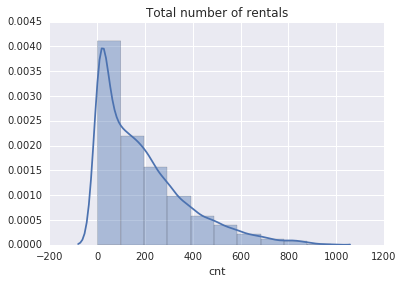

In [12]:
# hist
sns.distplot(bike_rentals.cnt, bins=10).set_title('Total number of rentals')
# right skewed distribution

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


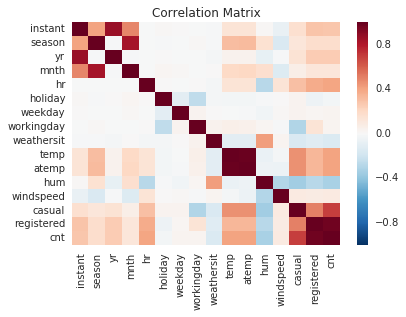

In [17]:
# lets check correlations
corrs = bike_rentals.corr()
print(corrs['cnt'])
sns.heatmap(corrs, fmt='f', linecolor='k', linewidths=0).set_title('Correlation Matrix')
# weather and hum seems to be the only two variables that are negativly correlated 
# with cnt. We have some positive correlations, not too strong.

In [18]:
# function to group hours of the day
def assign_label(x):
    if x >= 0 and x < 6:
        return 4
    if x >= 6 and x < 12:
        return 1
    if x >= 12 and x < 18:
        return 2
    if x >= 18 and x < 24:
        return 3
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [19]:
# split train and test
# mse will be used as a metric for cnt
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

# list of predictors
predictors = list(train.columns)
predictors.remove('cnt')
predictors.remove('casual')
predictors.remove('registered')
predictors.remove('dteday')

# model
lnreg = LinearRegression()
lnreg.fit(train[predictors], train['cnt'])

# predictions
predictions = lnreg.predict(test[predictors])

# mse
print("MSE of Linear Regression : ",np.mean((predictions - test['cnt']) ** 2))

MSE of Linear Regression :  16931.438457474047


MSE penalizes high errors, which can be frequent because the distribution of the response is skewed towards zero. The error is high.

In [23]:
from sklearn.tree import DecisionTreeRegressor

# fit tree
dt = DecisionTreeRegressor()
dt.fit(train[predictors], train['cnt'])

# predictions
predictions = dt.predict(test[predictors])

# mse
print("MSE of Decision Tree : ", np.mean((predictions - test['cnt']) ** 2))

MSE of Decision Tree :  2884.063003452244


Much lower error with a simple decision tree, compared to a Linear Regression.

In [26]:
# fit tree
dt = DecisionTreeRegressor(min_samples_leaf = 10)
dt.fit(train[predictors], train['cnt'])

# predictions
predictions = dt.predict(test[predictors])

# mse
print("MSE of Decision Tree : ", np.mean((predictions - test['cnt']) ** 2))

MSE of Decision Tree :  2599.467076024013


In [27]:
from sklearn.ensemble import RandomForestRegressor

# fit rf
rfr = RandomForestRegressor()
rfr.fit(train[predictors], train['cnt'])

# predictions
predictions = rfr.predict(test[predictors])

# mse
print("MSE of RF : ", np.mean((predictions - test['cnt']) ** 2))

MSE of RF :  1785.0518814729573


Again the MSE is getting lower.

In [ ]:
# fit rf
rfr = RandomForestRegressor(min_samples_leaf=2)
rfr.fit(train[predictors], train['cnt'])

# predictions
predictions = rfr.predict(test[predictors])

# mse
print("MSE of RF : ", np.mean((predictions - test['cnt']) ** 2))